In [2]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'rgomathi-covid19-uscases' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=rgomathi-covid19-uscases:US:bquxjob_38f36bec_184981a45fa)
back to BigQuery to edit the query within the BigQuery user interface.

In [3]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_38f36bec_184981a45fa') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT  * FROM `bigquery-public-data.covid19_usafacts.confirmed_cases` WHERE state = "IN"  and county_name ="Monroe County " LIMIT 1000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_38f36bec_184981a45fa') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,county_fips_code,county_name,state,state_fips_code,_2020_01_22,_2020_01_23,_2020_01_24,_2020_01_25,_2020_01_26,_2020_01_27,...,_2022_11_04,_2022_11_05,_2022_11_06,_2022_11_07,_2022_11_08,_2022_11_09,_2022_11_10,_2022_11_11,_2022_11_12,_2022_11_13
0,18105,Monroe County,IN,18,0,0,0,0,0,0,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [5]:
results.describe()

,_2020_01_22,_2020_01_23,_2020_01_24,_2020_01_25,_2020_01_26,_2020_01_27,_2020_01_28,_2020_01_29,_2020_01_30,_2020_01_31,...,_2022_11_04,_2022_11_05,_2022_11_06,_2022_11_07,_2022_11_08,_2022_11_09,_2022_11_10,_2022_11_11,_2022_11_12,_2022_11_13
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27629.0,27629.0,27629.0,27629.0,27629.0,27629.0,27629.0,27629.0,27629.0,27629.0
std,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
min,0,0,0,0,0,0,0,0,0,0,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629
25%,0,0,0,0,0,0,0,0,0,0,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629
50%,0,0,0,0,0,0,0,0,0,0,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629
75%,0,0,0,0,0,0,0,0,0,0,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629
max,0,0,0,0,0,0,0,0,0,0,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629


In [32]:
results['_2020_01_22'].dtype

Int64Dtype()

In [7]:
import matplotlib.pyplot as plt

In [34]:
from datetime import datetime

In [57]:
mon={}
for i in results.columns[4:]:
    x=datetime.strptime(i, '_%Y_%m_%d').strftime("%b %Y")
    if x not in mon:
        mon[x]=1
    else:
        mon[x]+=1

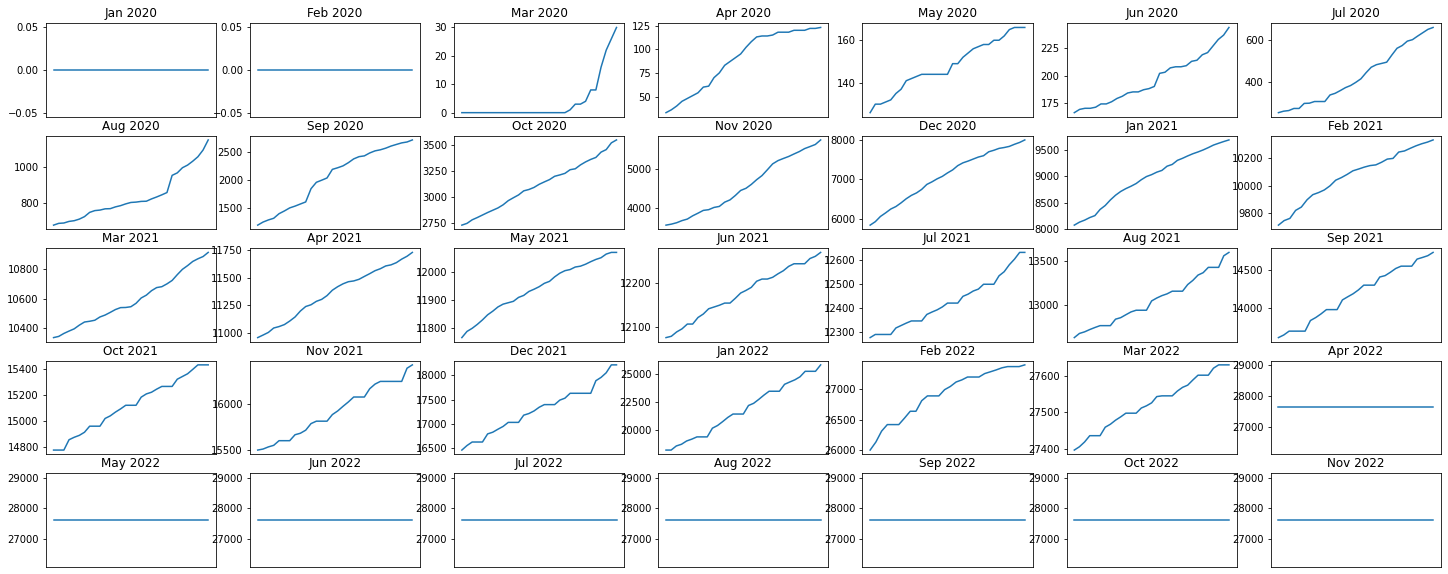

In [62]:
tot=4
for i in range(1,len(mon)+1):
    tit=list(mon.keys())[i-1]
    plt.subplot(5,7,i)
    plt.title(tit)
    plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
    plt.plot(results.columns[tot:mon[tit]+tot],results.values[0][tot:mon[tit]+tot])
    tot+=mon[tit]